# 재미로 한 번 해봤습니다.

제 과제는 주가 데이터를 기반으로 오르냐 안 오르냐를 예측하는 것인데, 이 파일에서는 주가 데이터를 기반으로 주가를 예측하는 딥러닝을 진행해봤습니다.

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

seed=0
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 데이터 불러오기

# 일반 데이터
data_set=pd.read_csv("./Data set_exception.csv")

In [4]:
data_set

,시가,고가,저가,거래량,종가
0,45500.0,46100.0,45200.0,11602464.0,45600.0
1,46200.0,46550.0,46100.0,10528665.0,46300.0
2,46400.0,46450.0,45400.0,11224077.0,46000.0
3,45900.0,46250.0,45450.0,11828104.0,45500.0
4,45800.0,46500.0,45750.0,11543389.0,46500.0
...,...,...,...,...,...
595,72400.0,73500.0,71900.0,28490496.0,72900.0
596,72200.0,72900.0,71600.0,25000338.0,71700.0
597,72100.0,73900.0,72000.0,24077996.0,73900.0
598,72700.0,73800.0,72500.0,39882928.0,72900.0


# 데이터셋 설정

여러번 실행해보기 위해 함수 사용

In [5]:
# window의 사이즈와 train dataset의 사이즈 입력받는 함수

def set_window_train_size(data):
    
    
    # 학습 데이터셋 70% 테스트 데이터셋 30%로 나눈다. (고정)
    train_size=int(len(data)*0.7) 
    
    # 시계열 데이터셋을 만들 때, 몇 개의 데이터를 가지고 만들지 설정
    window_size=int(input("window size : "))

    return window_size, train_size

In [6]:
# feature 데이터와 close(종가) 데이터를 구분
def split_feature_close(data):
    
    feature_cols = ['시가', '고가', '저가', '거래량']
    close_cols = ['종가']
    
    data_feature = data[feature_cols]
    data_close = data[close_cols]
    
    return data_feature, data_close

In [7]:
# window_size에 따라 데이터를 묶어주고 새로운 데이터셋 리턴
def make_window_data(feature, close, window_size):
    
    feature_list=[]
    close_list=[]
    
    for i in range(len(feature)-window_size):
        feature_list.append(np.array(feature.iloc[i:i+window_size]))
        close_list.append(np.array(close.iloc[i+window_size]))
        
    return np.array(feature_list), np.array(close_list)

In [8]:
def make_dataset(data):
    
    # 한 번에 묶이는 데이터 크기(window_size)와 학습 데이터(train_size)의 크기
    window_size, train_size=set_window_train_size(data)
    
    # 학습 데이터셋과 테스트 데이터셋 분리
    train = data[:train_size] 
    test = data[train_size:] 
    
    train_feature, train_close = split_feature_close(train)
    test_feature, test_close = split_feature_close(test)
    
    train_feature, train_close = make_window_data(train_feature, train_close, window_size)
    test_feature, test_close = make_window_data(test_feature, test_close, window_size)
    
    return train_feature, train_close, test_feature, test_close

In [9]:
# 학습 데이터셋을 train과 valid로 분리

def train_valid(train_feature,train_close):
    split_size= float(input("전체 중 test size의 비율 (예 : 0.2) : "))
    X_train, X_valid, Y_train, Y_valid = train_test_split(train_feature, train_close, test_size = split_size, random_state=seed)
    return X_train, X_valid, Y_train, Y_valid

# 기본 데이터에 대한 딥러닝

In [56]:
train_feature, train_close, test_feature, test_close = make_dataset(data_set)

X_train, X_valid, Y_train, Y_valid = train_valid(train_feature, train_close)

window size : 20
전체 중 test size의 비율 (예 : 0.2) : 0.2


In [85]:
model = Sequential()
model.add(LSTM(20, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False))
model.add(Dense(1,activation='linear'))

In [88]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')
early_stop = EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(X_train, Y_train, 
                    epochs=300, 
                    batch_size=10,
                    validation_data=(X_valid, Y_valid), 
                    callbacks=[early_stop])

Train on 320 samples, validate on 80 samples
Epoch 1/300
320/320 [==============================] - 1s 4ms/sample - loss: 7868309316.0000 - val_loss: 3256640112.0000
Epoch 2/300
320/320 [==============================] - 0s 744us/sample - loss: 3165845625.0000 - val_loss: 1564618972.0000
Epoch 3/300
320/320 [==============================] - 0s 735us/sample - loss: 1379785286.0000 - val_loss: 818755908.0000
Epoch 4/300
320/320 [==============================] - 0s 804us/sample - loss: 1242443085.0000 - val_loss: 496490256.0000
Epoch 5/300
320/320 [==============================] - 0s 795us/sample - loss: 629926728.2500 - val_loss: 432745308.0000
Epoch 6/300
320/320 [==============================] - 0s 869us/sample - loss: 681505532.5000 - val_loss: 309258062.0000
Epoch 7/300
320/320 [==============================] - 0s 834us/sample - loss: 1518907834.0000 - val_loss: 327770775.0000
Epoch 8/300
320/320 [==============================] - 0s 800us/sample - loss: 426073387.0000 - val_los

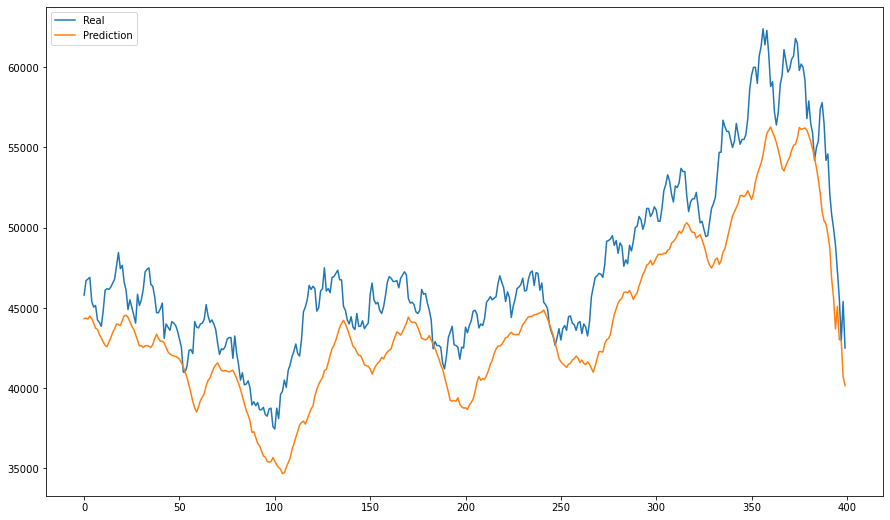

In [89]:
# 속성만으로 예측
pred = model.predict(train_feature)
plt.figure(figsize=(15, 9))

# train_close에는 실제 종가 데이터가 들어있음
plt.plot(train_close, label='Real')
plt.plot(pred, label='Prediction')
plt.legend() #범례
plt.show()

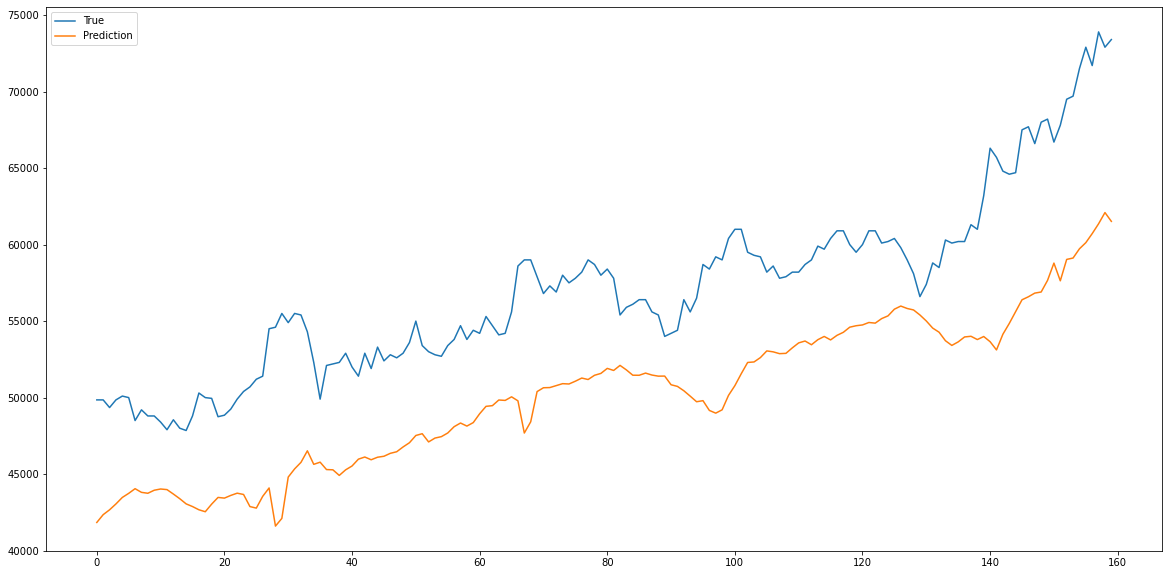

In [90]:
pred = model.predict(test_feature)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(test_close, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

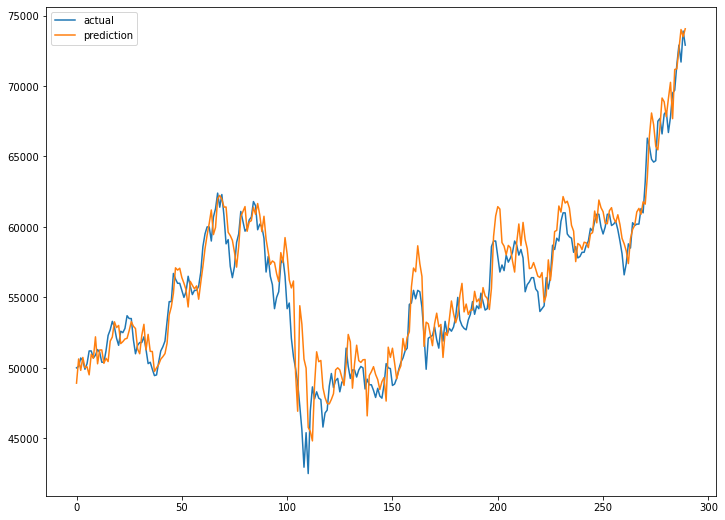

In [90]:
# 과제 초기에 재미삼아 해봤을 때 학습이 아주 잘 된 경우
# 300에 20
plt.figure(figsize=(12, 9))
plt.plot(test_close, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()